#Introduction
Personal lending by banks and institutions is an activity that brings direct profits and also comes with many risks. This case study aims to minimize the risk of losing money while lending to customers.

When the company receives a loan application, the company has to decide on loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business for the company.
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

* The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
* All other cases: All other cases when the payment is paid on time

This case study is designed to help the company decide whether or not to approve this loan.

Data Source: https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?select=application_data.csv

# Exploratory data analysis (EDA):

## Import relevant libraries and datasets.
Firstly, let's import relevant libraries and data.

In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DataSets/Loan_Defaulter/application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
columns_info = pd.read_csv('/content/gdrive/MyDrive/DataSets/Loan_Defaulter/columns_description.csv')
columns_info.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## Describe the dataset
Next, we describe the dataset with the necessary information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Detect missing values
Then, we calculate the data missing percentage.

In [ ]:
def missing_pct(df):
    # Calculate percentage of missing for each column
    s_missing = df.isnull().sum() * 100 / df.shape[0]
    # Convert the series back to data frame
    df_missing = pd.DataFrame(s_missing).round(2)
    # Reset and rename the index
    df_missing = df_missing.reset_index().rename(
                    columns={'index':'Column', 0:'Missing_Percentage (%)'})
    # Sort the data frame
    df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    return df_missing

In [ ]:
Missing_Percentage = missing_pct(df)
Missing_Percentage

,Column,Missing_Percentage (%)
76,COMMONAREA_MEDI,69.87
48,COMMONAREA_AVG,69.87
62,COMMONAREA_MODE,69.87
70,NONLIVINGAPARTMENTS_MODE,69.43
56,NONLIVINGAPARTMENTS_AVG,69.43
...,...,...
14,NAME_FAMILY_STATUS,0.00
13,NAME_EDUCATION_TYPE,0.00
12,NAME_INCOME_TYPE,0.00
9,AMT_ANNUITY,0.00


According to the above statistics, we will delete columns with a missing rate greater than 50%.

In [ ]:
missing_col_greater50 = Missing_Percentage[(Missing_Percentage['Missing_Percentage (%)'] > 50)]['Column'].to_numpy()
missing_col_greater50

array(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'HOUSETYPE_MODE'], dtype=object)

In [ ]:
for col in missing_col_greater50:
        del df[col]
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let's see our data based on the data type.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [ ]:
df.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN


In [ ]:
df.select_dtypes(include=['float64']).head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,0.9722,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,NaN,0.9851,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.select_dtypes(include=['int64']).head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Count the number of the unique values
Then, let's count the unique values for each feature.

In [ ]:
def count_unique_value(df):
    # Count unique value for each feature
    s_unique = df.nunique()
    # Convert the series back to data frame
    df_unique = pd.DataFrame(s_unique).round(2)
    # Reset and rename the index
    df_unique = df_unique.reset_index().rename(
                    columns={'index':'Column', 0:'Number of unique values'})
    # Sort the data frame
    df_unique = df_unique.sort_values('Number of unique values', ascending=False)
    return df_unique

In [ ]:
count_unique_value(df)

,Column,Number of unique values
0,SK_ID_CURR,307511
40,EXT_SOURCE_2,119831
17,DAYS_BIRTH,17460
19,DAYS_REGISTRATION,15688
9,AMT_ANNUITY,13672
...,...,...
4,FLAG_OWN_CAR,2
55,FLAG_DOCUMENT_2,2
56,FLAG_DOCUMENT_3,2
57,FLAG_DOCUMENT_4,2


In [ ]:
binary_columns = df.columns[df.isin([0,1]).all()]
for col in binary_columns:
     df[col] = df[col].astype(str)

## Detect the Outliers
In this part, we will find Outliers and use the Capping technique to handle them.

In [ ]:
df_type_float_int = df.select_dtypes(include=['float64','int64']).columns
df_type_float_int

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

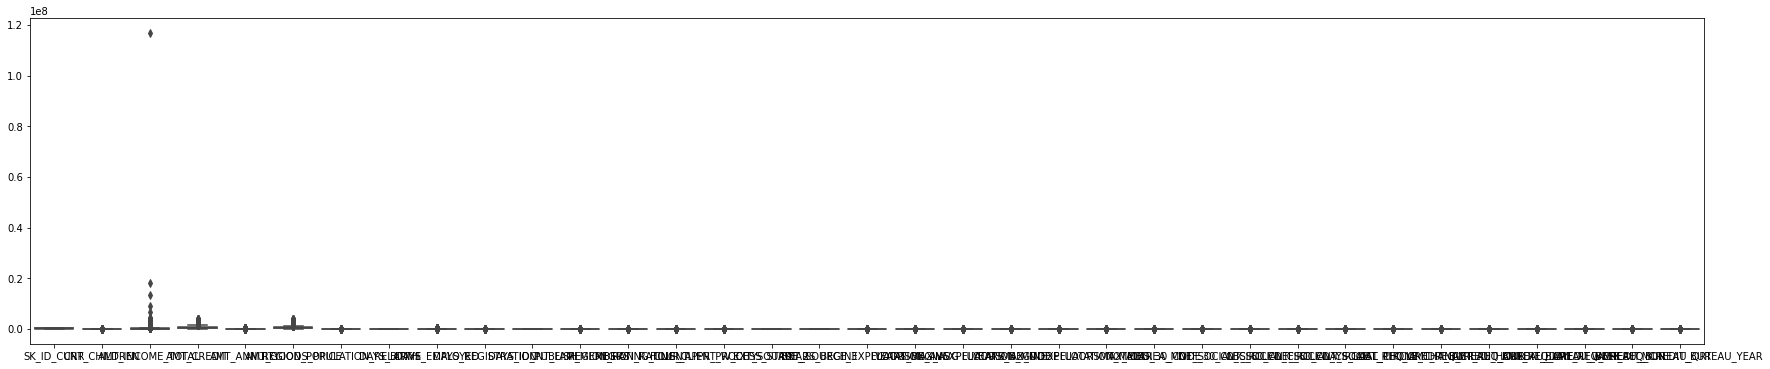

In [ ]:
plt.figure(figsize=(30,6))
sns.boxplot(data=df[df_type_float_int])
plt.show()

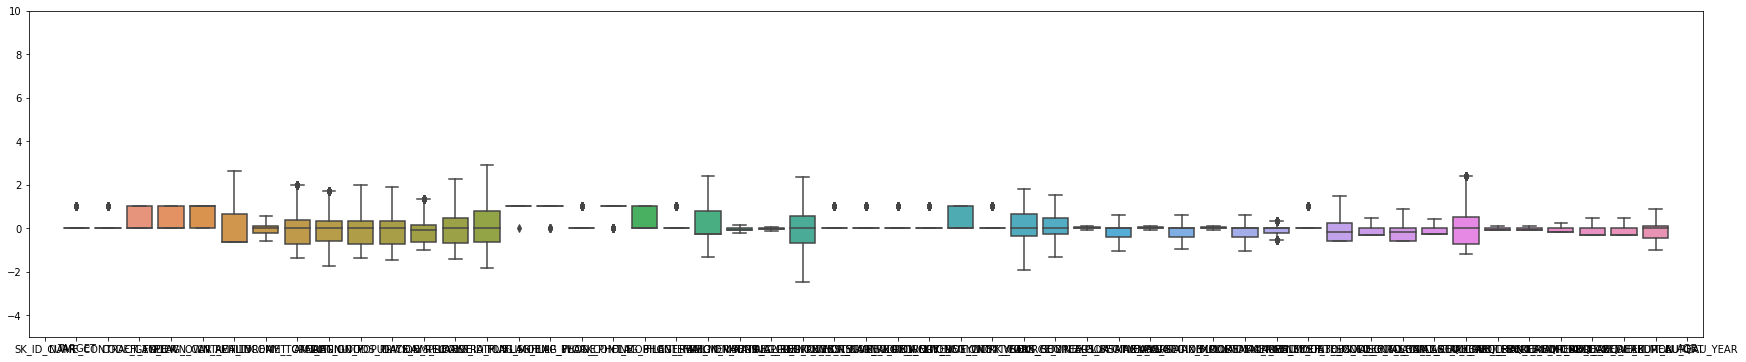

In [ ]:
plt.figure(figsize=(30,6))
sns.boxplot(data=df).set_ylim(-5,10)
plt.show()

## Detect Abnormal Data
In this section, we will find abnormal data. 

Columns starting with FLAG_DOCUMENT mean 'Did client provide document'. These column does not explain the meaning of features in the model, so we remove these columns.

In [ ]:
for col in binary_columns:
     df[col] = df[col].astype(int)

In [ ]:
col_flag = [col for col in df.columns if col[:-1].startswith('FLAG_DOCUMENT')]
for col in col_flag:
        del df[col]

We will list the columns of negative values and find out what these columns mean.

In [ ]:
pd.set_option('display.max_colwidth', None)
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']
col_negative = df[[*numerical_columns]].columns[(df[[*numerical_columns]] < 0).any()].tolist()
columns_info.loc[columns_info['Row'].isin(col_negative)][['Row','Description','Special']]

,Row,Description,Special
17,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
18,DAYS_EMPLOYED,How many days before the application the person started current employment,time only relative to the application
19,DAYS_REGISTRATION,How many days before the application did client change his registration,time only relative to the application
20,DAYS_ID_PUBLISH,How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application
95,DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone,NaN


In [ ]:
df['AGE'] = -round(df['DAYS_BIRTH']/365,0)
df = df.drop(['DAYS_BIRTH'], axis=1)
df['AGE']

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: AGE, Length: 307511, dtype: float64

In [ ]:
df['DAYS_EMPLOYED'] = -df['DAYS_EMPLOYED']
df['DAYS_REGISTRATION'] = -df['DAYS_REGISTRATION']
df['DAYS_ID_PUBLISH'] = -df['DAYS_ID_PUBLISH']
df['DAYS_LAST_PHONE_CHANGE'] = -df['DAYS_LAST_PHONE_CHANGE']

In [ ]:
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']
df[[*numerical_columns]].columns[(df[[*numerical_columns]] < 0).any()].tolist()

['DAYS_EMPLOYED']

In [ ]:
df[df['DAYS_EMPLOYED'] < 0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0.0,0.0,2396.0,0.0,0.0,0.0,0.0,0.0,2.0,56.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0.0,0.0,795.0,0.0,0.0,0.0,0.0,0.0,3.0,68.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0.0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,3.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,11.0,0.0,1667.0,0.0,0.0,0.0,1.0,0.0,0.0,61.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,1.0,1.0,1775.0,0.0,0.0,0.0,0.0,0.0,5.0,68.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0.0,0.0,846.0,0.0,0.0,0.0,0.0,1.0,8.0,63.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,2.0,0.0,0.0,67.0


In [ ]:
df.drop(df[df['DAYS_EMPLOYED'] < 0].index, inplace = True)

# Data cleaning and preprocessing

## Scale Data

In [ ]:
df_type_float_int

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
df_type_float_int = np.delete(df_type_float_int, np.argwhere(df_type_float_int == 'SK_ID_CURR'))
df_type_float_int = np.delete(df_type_float_int, np.argwhere(df_type_float_int == 'DAYS_BIRTH'))
df_type_float_int

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df[df_type_float_int])
df[df_type_float_int] = pd.DataFrame(df_std, columns=df_type_float_int)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,-0.653225,0.102707,-0.503783,-0.212444,...,0.252813,5.311634,0.196979,-0.077419,-0.062847,-0.167981,-0.297358,-0.315429,-0.468861,26.0
1,100003,0,Cash loans,F,N,N,-0.653225,0.363475,1.677884,0.538389,...,-0.167627,-0.272685,-0.172897,-0.077419,-0.062847,-0.167981,-0.297358,-0.315429,-1.016418,46.0
2,100004,0,Revolving loans,M,Y,Y,-0.653225,-0.418828,-1.171876,-1.437924,...,-0.588068,-0.272685,-0.188611,-0.077419,-0.062847,-0.167981,-0.297358,-0.315429,-1.016418,52.0
3,100006,0,Cash loans,F,N,Y,-0.653225,-0.158060,-0.734801,0.127950,...,0.252813,-0.272685,-0.427943,NaN,NaN,NaN,NaN,NaN,NaN,52.0
4,100007,0,Cash loans,M,N,Y,-0.653225,-0.210214,-0.242047,-0.405990,...,-0.588068,-0.272685,0.163134,-0.077419,-0.062847,-0.167981,-0.297358,-0.315429,-1.016418,55.0


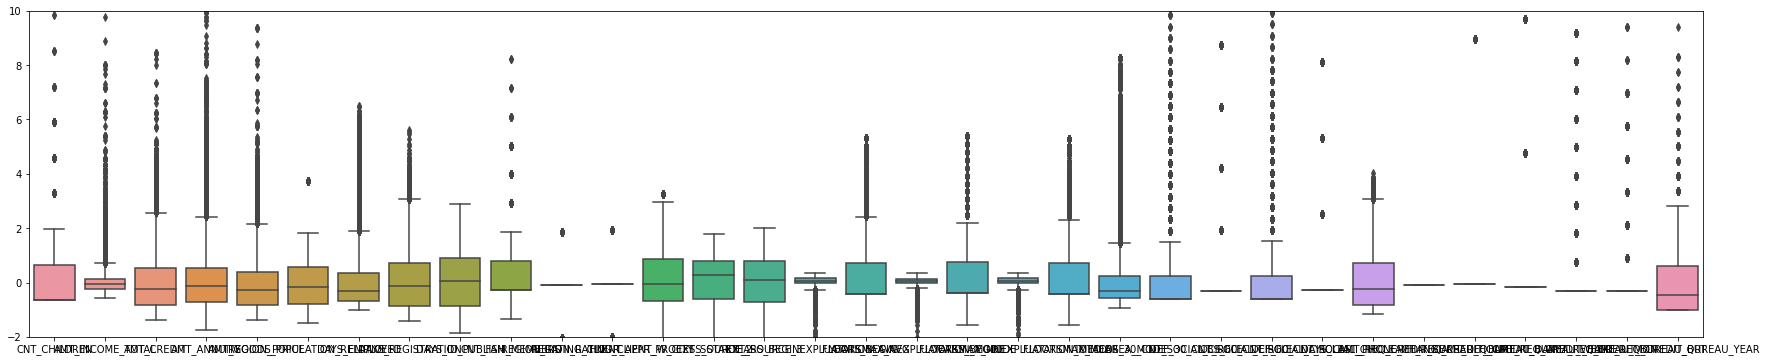

In [ ]:
plt.figure(figsize=(30,6))
sns.boxplot(data=df[df_type_float_int]).set_ylim(-2,10)
plt.show()

## Handle missing value
In the previous section, we removed columns with a missing value rate greater than 50%. So, in this part, we deal with the remaining missing values columns.

In [ ]:
Missing_Percentage = missing_pct(df)
missing_col = Missing_Percentage[(Missing_Percentage['Missing_Percentage (%)'] > 0)]['Column'].to_numpy()
missing_col, len(missing_col)

(array(['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
        'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
        'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE',
        'EMERGENCYSTATE_MODE', 'EXT_SOURCE_3',
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
        'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
        'CNT_FAM_MEMBERS', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
        'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE',
        'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY', 'AMT_CREDIT',
        'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'OCCUPATION_TYPE',
        'NAME_TYPE_SUITE'], dtype=object), 36)

In [ ]:
from sklearn.impute import SimpleImputer
col_type_object_missing = df[[*missing_col]].select_dtypes(include=['object']).columns
for col in col_type_object_missing:
    imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
    df[col] = imputer.fit_transform(df[[col]])

In [ ]:
col_type_constant_missing = df[[*missing_col]].select_dtypes(include=['float64','int64']).columns
for col in col_type_constant_missing:
    imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
    df[col] = imputer.fit_transform(df[[col]])

In [ ]:
missing_pct(df)

,Column,Missing_Percentage (%)
0,SK_ID_CURR,0.0
31,HOUR_APPR_PROCESS_START,0.0
33,REG_REGION_NOT_WORK_REGION,0.0
34,LIVE_REGION_NOT_WORK_REGION,0.0
35,REG_CITY_NOT_LIVE_CITY,0.0
...,...,...
25,FLAG_EMAIL,0.0
26,OCCUPATION_TYPE,0.0
27,CNT_FAM_MEMBERS,0.0
28,REGION_RATING_CLIENT,0.0


## Capping Outliers

In [ ]:
for col in df_type_float_int:
    #Find Q1, Q3
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    #Calculate IQR
    IQR = q3 - q1
    #Define max, min limit
    max_limit = q3 + 1.5*IQR
    min_limit = q1 - 1.5*IQR
    if df[col].max() > max_limit or df[col].min() < min_limit:
         df[col] = pd.DataFrame(np.where(df[col] > max_limit, max_limit,
                                              (np.where(df[col] < min_limit, min_limit, df[col]))), 
                                              columns = [col])

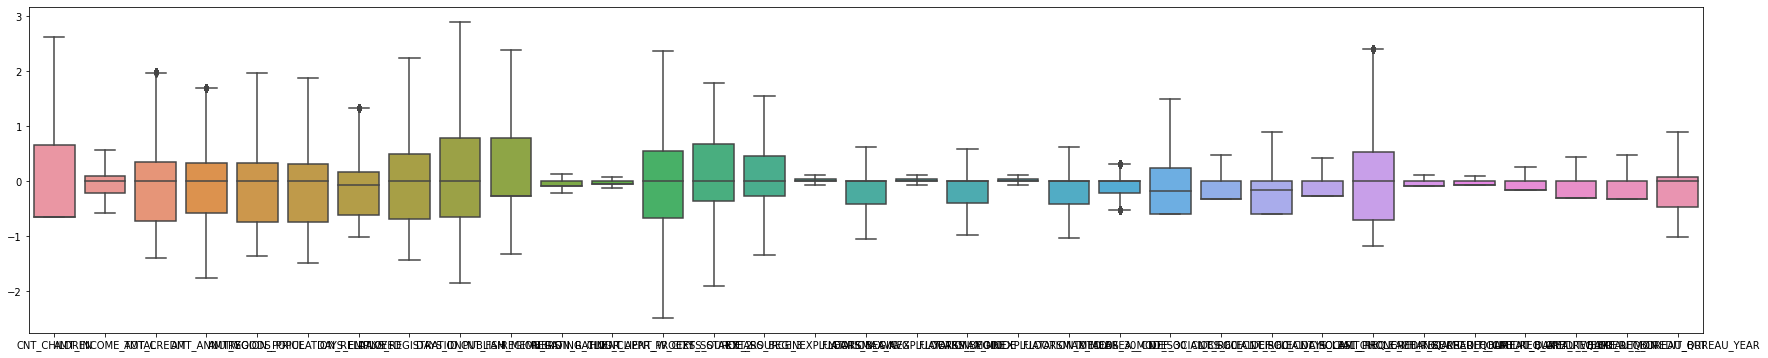

In [ ]:
plt.figure(figsize=(30,6))
sns.boxplot(data=df[df_type_float_int])
plt.show()

## One Hot Encoder
The datasets have some category columns. Therefore, we have to encode the categorical data.

In [ ]:
df.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,No


In [ ]:
pd.pivot_table(df,values='SK_ID_CURR',index='TARGET',columns='NAME_CONTRACT_TYPE',aggfunc='count',sort=True)

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,205853,24449
1,20371,1464


In [ ]:
contract_type_dict = {'Revolving loans':1, 'Cash loans':0}
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map(contract_type_dict)

In [ ]:
gender_dict = {'M':1, 'F':0, 'XNA':0}
df['CODE_GENDER'] = df['CODE_GENDER'].map(gender_dict)

In [ ]:
owncar_dict = {'Y':1, 'N':0}
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map(owncar_dict)

In [ ]:
ownrealty_dict = {'Y':1, 'N':0}
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map(ownrealty_dict)

In [ ]:
emergency_dict = {'Yes':1, 'No':0}
df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].map(emergency_dict)

In [ ]:
df = df.drop(['WEEKDAY_APPR_PROCESS_START'],axis=1)

In [ ]:
dummies_col = df.select_dtypes(include=['object']).columns
dummies_col

Index(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
df_new = pd.get_dummies(data=df, columns=dummies_col)
df_new = df_new.drop('SK_ID_CURR',axis=1)
df_new.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,1,0,1,0,1,-0.653225,0.102707,-0.503783,-0.212444,-0.531537,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-0.653225,0.363475,1.677884,0.538389,1.554097,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,-0.653225,-0.418828,-1.171876,-1.437924,-1.110210,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,-0.653225,-0.158060,-0.734801,0.127950,-0.676205,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,-0.653225,-0.210214,-0.242047,-0.405990,-0.097532,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206682 entries, 0 to 252136
Columns: 158 entries, TARGET to ORGANIZATION_TYPE_University
dtypes: float64(34), int64(18), uint8(106)
memory usage: 104.5 MB


## Feature Selection
Let's find out some of the category features that greatly influence the behavior of defaulting on debt.

In [ ]:
classification_col = df_new.columns[df_new.isin([0,1]).all()]
from sklearn.linear_model import LogisticRegression
# define dataset
X = df_new[classification_col].drop(['TARGET'] , axis =1)
y = df_new['TARGET']
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# summarize feature importance
cdf = pd.DataFrame(importance, X.columns, columns=['Coefficients'])
cdf['ABS']= abs (cdf['Coefficients'])
cdf = cdf.sort_values(by=['ABS'],ascending=False).reset_index()
cdf.head(40)

,index,Coefficients,ABS
0,ORGANIZATION_TYPE_Transport: type 3,0.634143,0.634143
1,ORGANIZATION_TYPE_Realtor,0.621681,0.621681
2,NAME_EDUCATION_TYPE_Academic degree,-0.589238,0.589238
3,FLAG_MOBIL,-0.547783,0.547783
4,FLAG_EMP_PHONE,-0.541386,0.541386
5,ORGANIZATION_TYPE_Industry: type 12,-0.477930,0.477930
6,NAME_CONTRACT_TYPE,-0.475727,0.475727
7,ORGANIZATION_TYPE_Transport: type 1,-0.441426,0.441426
8,NAME_FAMILY_STATUS_Widow,-0.430558,0.430558
9,ORGANIZATION_TYPE_Police,-0.397866,0.397866


In [ ]:
classification_col_select = cdf.head(40)['index'].tolist()
classification_col_select.sort()
classification_col_select

['CODE_GENDER',
 'FLAG_CONT_MOBILE',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_PHONE',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_TYPE_SUITE_Other_A',
 'OCCUPATION_TYPE_Accountants',
 'OCCUPATION_TYPE_High skill tech staff',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'OCCUPATION_TYPE_Private service staff',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Construction',
 'ORGANIZATION_TYPE_Emergency',
 'ORGANIZATION_TYPE_Hotel',
 'ORGANIZATION_TYPE_Industry: type 1',
 'ORGANIZATION_TYPE_Industry: type 12',
 'ORGANIZATION_TYPE_Industry: type 5',
 'ORGANIZATION_TYPE_Industry: type 6',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Military',
 'ORGANIZATION_TYPE_Mobile',
 'ORGANIZATION_TYPE_Police',
 'ORGANIZATION_TYPE_Realtor',
 'ORGANIZATION_TYPE_Restaurant',
 'ORGANIZATION_TYPE_Security M

Next, let's find out the numerical features that affect the ability to pay debts.

In [ ]:
numerical_col = [col for col in df_new.columns if col not in classification_col]
numerical_col = np.delete(numerical_col, np.argwhere(numerical_col == 'EXT_SOURCE_2'))
numerical_col = np.delete(numerical_col, np.argwhere(numerical_col == 'EXT_SOURCE_3'))
numerical_col = np.delete(numerical_col, np.argwhere(numerical_col == 'EXT_SOURCE_2'))
numerical_col, len(numerical_col)

(array(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
        'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
        'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
        'HOUR_APPR_PROCESS_START', 'YEARS_BEGINEXPLUATATION_AVG',
        'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
        'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
        'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
        'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'], dtype='<U28'), 32)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define dataset
X = df_new[numerical_col]
y = df_new['TARGET']
# define feature selection
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
# apply feature selection
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

In [ ]:
numerical_col_select = features_df_new.columns
numerical_col_select.sort_values()
numerical_col_select

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE'],
      dtype='object')

# Data Visualization
In this section, let's visualize some features to better understand the data.

## Imbalanced Data

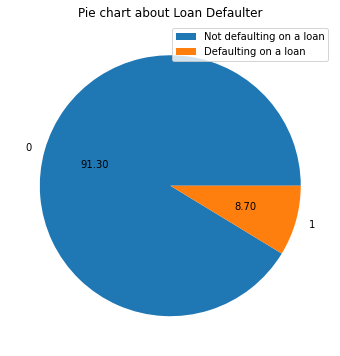

In [ ]:
df_stats = df_new.TARGET.value_counts()
plt.figure(figsize=(6,6))
plt.pie(df_stats, labels = df_stats.index, autopct = '%.2f')
plt.title('Pie chart about Loan Defaulter')
plt.legend(['Not defaulting on a loan','Defaulting on a loan'])
plt.show()

The pie chart shows that the number of people who do not pay on time accounts for only 9% of the total number of borrowers. This dataset is imbalanced. Therefore, in the next part, we will use the Random Resampling Imbalanced Datasets method.

## Correlation coefficient
In this section, we will visualize the correlation coefficient between features and labels.

In [ ]:
total_col = np.concatenate((classification_col_select, numerical_col_select))
len(total_col), total_col

(50, array(['CODE_GENDER', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
        'FLAG_OWN_CAR', 'FLAG_PHONE', 'NAME_CONTRACT_TYPE',
        'NAME_EDUCATION_TYPE_Academic degree',
        'NAME_EDUCATION_TYPE_Higher education',
        'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_FAMILY_STATUS_Widow',
        'NAME_HOUSING_TYPE_Office apartment', 'NAME_TYPE_SUITE_Other_A',
        'OCCUPATION_TYPE_Accountants',
        'OCCUPATION_TYPE_High skill tech staff',
        'OCCUPATION_TYPE_Low-skill Laborers',
        'OCCUPATION_TYPE_Private service staff',
        'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Construction',
        'ORGANIZATION_TYPE_Emergency', 'ORGANIZATION_TYPE_Hotel',
        'ORGANIZATION_TYPE_Industry: type 1',
        'ORGANIZATION_TYPE_Industry: type 12',
        'ORGANIZATION_TYPE_Industry: type 5',
        'ORGANIZATION_TYPE_Industry: type 6',
        'ORGANIZATION_TYPE_Legal Services', 'ORGANIZATION_TYPE_Military',
        'ORGANIZATION_TYPE_Mobile', 'O

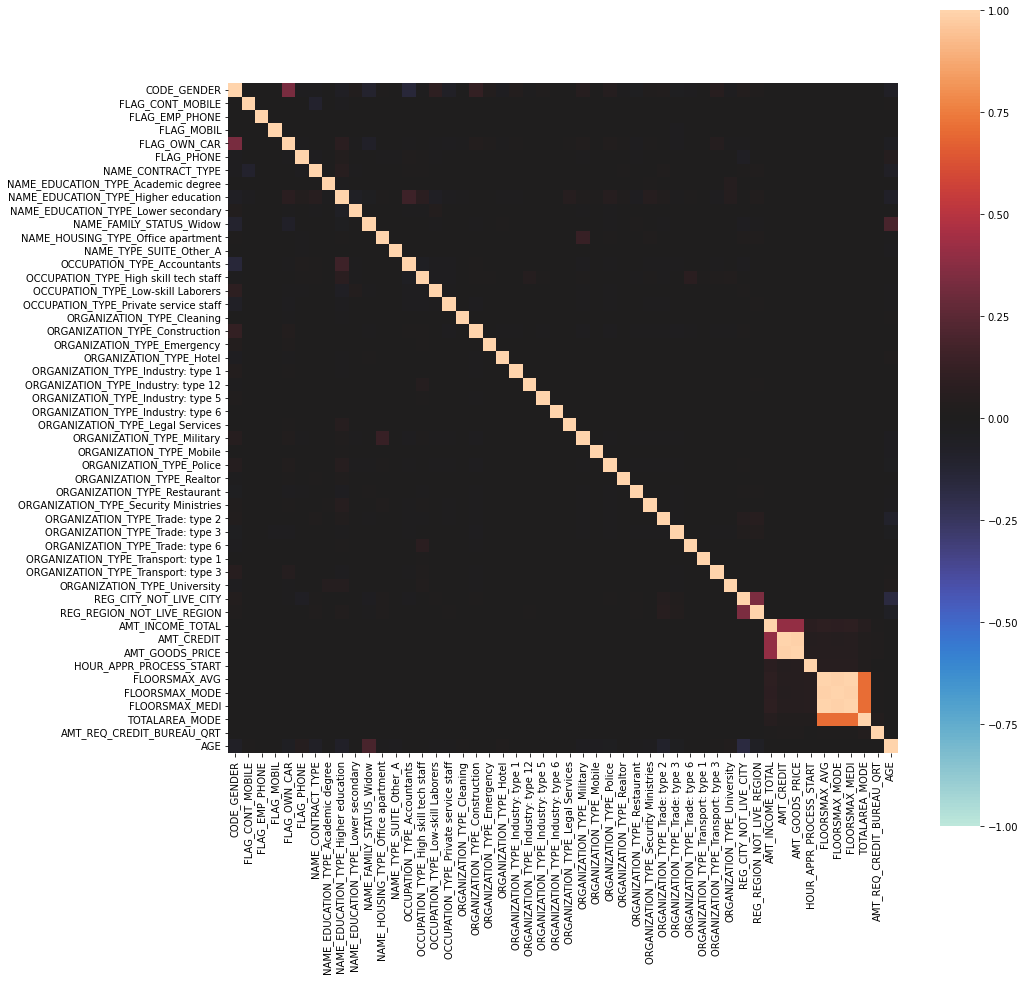

In [ ]:
from dython.nominal import associations
fig, ax = plt.subplots(figsize=(15, 15))
associations(df_new[total_col], ax=ax, annot=False)
fig.savefig('Categorical Corr Heat Map.png')

Based on the figure above, we see that most of the features have a low correlation. However, there are still some features with high correlation. Therefore, we will select the appropriate features to include in the model.

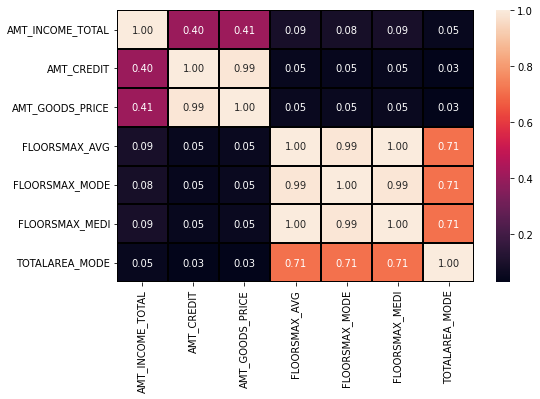

In [ ]:
high_corr_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE']
plt.figure(figsize=(8,5))
ax = sns.heatmap(df_new[high_corr_col].corr(), annot=True, fmt='.2f', linewidths = 0.01, linecolor='black')
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)
Rows = df_new[[*high_corr_col]].columns[(df[[*high_corr_col]] < 0).any()].tolist()
columns_info.loc[columns_info['Row'].isin(Rows)][['Row','Description','Special']]

,Row,Description,Special
7,AMT_INCOME_TOTAL,Income of the client,NaN
8,AMT_CREDIT,Credit amount of the loan,NaN
10,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
51,FLOORSMAX_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
65,FLOORSMAX_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
79,FLOORSMAX_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
88,TOTALAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
127,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
129,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN


Based on the description of highly correlated features, we find that the variables representing the content are similar. So we will remove and keep the following features: 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'FLOORSMAX_AVG'.

In [ ]:
high_corr_col = ['AMT_GOODS_PRICE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE']
for col in high_corr_col:
        total_col = np.delete(total_col, np.argwhere(total_col == col))

# Modeling with suitable algorithm

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new[total_col], df_new['TARGET'], test_size=0.2, shuffle = True, random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='all')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(max_iter = 1000)
clr.fit(X_over, y_over)

LogisticRegression(max_iter=1000)

# Evaluate model

In [ ]:
y_pred = clr.predict(X_test) #predict_proba
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72     37741
           1       0.12      0.62      0.21      3596

    accuracy                           0.59     41337
   macro avg       0.53      0.60      0.47     41337
weighted avg       0.87      0.59      0.68     41337



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


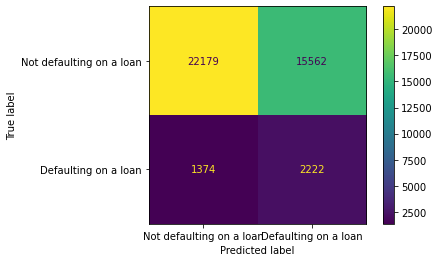

In [ ]:
plot_confusion_matrix(clr, X_test, y_test, display_labels=['Not defaulting on a loan','Defaulting on a loan'])
plt.show()

# Conclusion

In [ ]:
importance = clr.coef_.reshape(46,1)
coef = pd.DataFrame(importance, X_test.columns, columns=['Coefficients'])
coef = coef.sort_values(by=['Coefficients'],ascending=False).reset_index()
coef

,index,Coefficients
0,ORGANIZATION_TYPE_Transport: type 3,0.601799
1,ORGANIZATION_TYPE_Realtor,0.501711
2,FLAG_MOBIL,0.474320
3,OCCUPATION_TYPE_Low-skill Laborers,0.437801
4,FLAG_EMP_PHONE,0.415932
5,CODE_GENDER,0.383053
6,ORGANIZATION_TYPE_Cleaning,0.375328
7,NAME_EDUCATION_TYPE_Lower secondary,0.335511
8,ORGANIZATION_TYPE_Restaurant,0.330026
9,REG_CITY_NOT_LIVE_CITY,0.298956


In [ ]:
coef[(coef['Coefficients'] > 0.09)].sort_values(by=['index'],ascending=False)

,index,Coefficients
9,REG_CITY_NOT_LIVE_CITY,0.298956
0,ORGANIZATION_TYPE_Transport: type 3,0.601799
8,ORGANIZATION_TYPE_Restaurant,0.330026
1,ORGANIZATION_TYPE_Realtor,0.501711
10,ORGANIZATION_TYPE_Mobile,0.243131
12,ORGANIZATION_TYPE_Legal Services,0.123627
11,ORGANIZATION_TYPE_Construction,0.238007
6,ORGANIZATION_TYPE_Cleaning,0.375328
3,OCCUPATION_TYPE_Low-skill Laborers,0.437801
7,NAME_EDUCATION_TYPE_Lower secondary,0.335511


From the data in the table above, we find out some characteristics of the person with payment difficulties:

* Gender: Female
* Do not live at the address announced on the application
* Do low-paid jobs: waiter, cleaner, realtor, builder...
* Owning low-value vehicle
* Low academic level, specifically Lower secondary
* Do not provide landline or work phone numbers